In [110]:
# import pkg_resources
# import types
# def get_imports():
#     for name, val in globals().items():
#         if isinstance(val, types.ModuleType):
#             # Split ensures you get root package, 
#             # not just imported function
#             name = val.__name__.split(".")[0]

#         elif isinstance(val, type):
#             name = val.__module__.split(".")[0]
            
#         # Some packages are weird and have different
#         # imported names vs. system/pip names. Unfortunately,
#         # there is no systematic way to get pip names from
#         # a package's imported name. You'll have to add
#         # exceptions to this list manually!
#         poorly_named_packages = {
#             "PIL": "Pillow",
#             "sklearn": "scikit-learn"
#         }
#         if name in poorly_named_packages.keys():
#             name = poorly_named_packages[name]
            
#         yield name
# imports = list(set(get_imports()))

# # The only way I found to get the version of the root package
# # from only the name of the package is to cross-check the names 
# # of installed packages vs. imported packages
# requirements = []
# for m in pkg_resources.working_set:
#     if m.project_name in imports and m.project_name!="pip":
#         requirements.append((m.project_name, m.version))

# for r in requirements:
#     print("{}=={}".format(*r))

In [111]:
# import subprocess

# packages = [
#     'nltk==3.7',
#     'matplotlib==3.5.2',
#     'numpy==1.21.5',
#     'pandas==1.4.4',
#     'textblob==0.15.3',
#     'seaborn==0.11.2'
# ]

# for package in packages:
#     # Split the package name and version
#     package_name, package_version = package.split('==')
    
#     # Use 'conda search' with '--info' to check available versions
#     search_command = f'conda search {package_name} --info'
#     search_output = subprocess.check_output(search_command, shell=True, text=True)
    
#     # Check if the desired version is available
#     if package_version in search_output:
#         install_command = f'conda install {package}'
#         print(f"Fetching command: {install_command}")
#     else:
#         print(f"Desired version {package_version} of {package_name} is not available.")


<div style="position: absolute; top: 0; right: 0;">
    <img src="https://coursereport-production.imgix.net/uploads/school/logo/62/original/blacksquare-logo.jpg?w=72&h=72" alt="Image">
</div>


# <center> BrainStation Capstone</center>

<div style=" justify-content: center; align-items: center; height: 100%;">
    <div style="text-align: center;">
        <img src="https://th.bing.com/th/id/OIG.SyoBFA29YRW8fF83wapS?w=270&h=270&c=6&r=0&o=5&pid=ImgGn" alt="Image" width="500">
    </div>
</div>


## Preprocessing
In this notebook, we will dive into the preprocessing phase of our project. Preprocessing is a critical step in data preparation, where we clean, transform, and encode the data to make it suitable for analysis and modeling. Our goal is to ensure data quality, handle missing values, convert object types to numerical representations, and engineer new features that can enhance our analysis and allow our models to generate good results.

# <center> Drug Review Preprocessing

<center> By Ali Mohammed</center>

In [2]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer
import requests
from bs4 import BeautifulSoup
import re
from sklearn.preprocessing import LabelEncoder
import pickle



In [3]:
df = pd.read_csv(r"C:\Users\xaliz\BrainStation\Capstone\Data\Preprocess_Drug.csv")


In [4]:
df.head()

,drugName,condition,review,rating,date,usefulCount,year
0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3,2015-10-28,4,2015
1,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,2015-10-27,7,2015
2,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,2015-10-26,12,2015
3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,2015-10-25,4,2015
4,Medroxyprogesterone,Birth Control,"""This is a horrible shot!! I got my first shot...",1,2015-10-24,3,2015


**Text Data Preprocessing**

In the text data preprocessing step, we define a series of functions to clean the review text data. Firstly, we convert the text to lowercase to ensure consistency and avoid any discrepancies arising from case sensitivity. Next, we remove special characters that may interfere with the natural language processing algorithms, such as punctuation marks and symbols. We also eliminate non-ASCII characters to handle any encoding issues effectively.

To improve the readability and uniformity of the text, we remove extra whitespaces between words and replace multiple consecutive dots with a single dot. Additionally, we identify and remove any special strings within the reviews that might not contribute to the overall sentiment analysis or predictive modeling.

By performing these preprocessing steps, we aim to standardize the text data and eliminate any noise or inconsistencies that might affect the accuracy and performance of our models. The resulting clean text will serve as a solid foundation for further analysis and feature extraction.

In [ ]:
def to_lower(review):
    lower = review.lower()
    return lower
#text to lower

In [ ]:
def remove_special_characters(review):
    special_remove = review.replace(r'[^\w\d\s]', ' ')
    return special_remove
#remove special characters like !?#$%^

In [115]:
def remove_non_ascii(review):
    ascii_remove = review.replace(r'[^\x00-\x7F]+', ' ')
    return ascii_remove
#remove no ascii characters

In [116]:
def remove_whitespaces(review):
    whitespace_remove = review.replace(r'^\s+|\s+?$', '')
    return whitespace_remove
#remove spaces

In [117]:
def remove_multiple_whitespaces(review):
    multiw_remove = review.replace(r'\s+', ' ')
    return multiw_remove

In [118]:
def replace_multiple_dots(review):
    dataframe = review.replace(r'\.{2,}', ' ')
    return dataframe

In [119]:
def remove_special_string(review):
    return review.replace("&#039;", "")
#webscrape issue removal

In [120]:
#function to employ our preprocessing
def review_clean(review):
    review = to_lower(review)
    review = remove_special_characters(review)
    review = remove_non_ascii(review)
    review = remove_whitespaces(review)
    review = remove_multiple_whitespaces(review)
    review = replace_multiple_dots(review)
    review = remove_special_string(review)
    return review

In [121]:
for num in range(5):
    print(df['review'][num])


"Been on the depo injection since January 2015, had bleeding but it stopped after a while. When I had another injection in June, I didn&#039;t bleed for about a month. Started spotting mid-July and since approx. August 1st, I have been bleeding constantly, heavy enough to use pads and now it&#039;s almost November! I&#039;m sick of bleeding and forking out money for sanitary pads when I shouldn&#039;t be bleeding-well not as long as I have been now! Currently awaiting an ultrasound to see what is happening. I would like to change my contraceptive but my doctor won&#039;t let me :("
"I have been on the shot 11 years and until a month ago, never 1 period or even spotting.  A month ago, dark brown blood, awful odor, &amp; now I have had  a full blown period for 2 days. Not sure what to think.  I have continued the shot all of these years only because of the absent monthly."
"Ive had four shots at this point. I was on birth control pills for years due to excessive bleeding and extreme pain

In [122]:
# Calculate the average  length of reviews before preprocessing
before_lengths = df['review'].apply(len)
average_before_length = before_lengths.mean()
print("Average  Length of Reviews (Before Preprocessing):", average_before_length)


Average  Length of Reviews (Before Preprocessing): 470.9458646108068


In [123]:
df['review'] = df['review'].apply(review_clean)

In [124]:
# Calculate the average maximum length of reviews after preprocessing
after_lengths = df['review'].apply(len)
average_after_length = after_lengths.mean()

print("Average Maximum Length of Reviews (After Preprocessing):", average_after_length)


Average Maximum Length of Reviews (After Preprocessing): 460.546161042357


## feature engineering

In [125]:
#Word count in each review
df['count_word']=df["review"].apply(lambda x: len(str(x).split()))

#Unique word count 
df['count_unique_word']=df["review"].apply(lambda x: len(set(str(x).split())))

#Letter count
df['count_letters']=df["review"].apply(lambda x: len(str(x)))

We have created additional features related to the word count, unique word count, and letter count in each review. These features provide valuable insights into the characteristics and composition of the reviews in our dataset.By considering the word count in each review, we can understand the length or verbosity of the reviews. Longer reviews may indicate more detailed or comprehensive feedback, while shorter reviews may be more concise or to the point. This feature can help us identify the level of detail provided by the reviewers and potentially uncover any patterns or trends based on the length of the reviews.

The unique word count feature measures the diversity of vocabulary used in the reviews. By counting the number of unique words, we can gain insights into the lexical richness and variation in the reviewers' language. Reviews with a higher count of unique words suggest a broader range of expressions and potentially a more nuanced understanding of the drugs and conditions discussed.Additionally, the letter count feature provides a measure of the overall length of the reviews in terms of characters. This feature can be useful for identifying any potential limitations or restrictions on review length imposed by the platform or users. It can also provide insights into the level of detail or brevity in the reviewers' feedback.

By incorporating these features, we aim to capture and quantify various aspects of the review text, enabling us to analyze the relationship between these textual characteristics and other variables of interest, such as ratings or conditions. These features enhance our understanding of the reviews and can potentially reveal meaningful patterns or correlations that contribute to our project's objectives, such as sentiment analysis or condition prediction.

In [126]:
# Perform the preprocessing on the 'review' column
df['review'] = df['review'].apply(review_clean)
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['review']=df['review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.head(10)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xaliz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,drugName,condition,review,rating,date,usefulCount,year,count_word,count_unique_word,count_letters
0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""been depo injection since january 2015, bleed...",3,2015-10-28,4,2015,100,77,558
1,Medroxyprogesterone,Abnormal Uterine Bleeding,"""i shot 11 years month ago, never 1 period eve...",8,2015-10-27,7,2015,59,46,294
2,Medroxyprogesterone,Birth Control,"""ive four shots point. birth control pills yea...",9,2015-10-26,12,2015,143,98,750
3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""i total 3 shots. got first one leaving hospit...",1,2015-10-25,4,2015,152,105,746
4,Medroxyprogesterone,Birth Control,"""this horrible shot!! got first shot august, e...",1,2015-10-24,3,2015,141,97,750
5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""im 18 got heavy bleeding. ive always heard bc...",5,2015-10-22,6,2015,113,88,554
6,Medroxyprogesterone,Abnormal Uterine Bleeding,"""im 19 heavy painful periods since forever! go...",5,2015-10-21,2,2015,121,89,633
7,Medroxyprogesterone,Abnormal Uterine Bleeding,"""im 30 year old woman. got shot august 9th. bl...",2,2015-10-21,5,2015,65,53,319
8,Medroxyprogesterone,Abnormal Uterine Bleeding,"""im 17 years old got shot august 2015, persona...",7,2015-10-20,2,2015,87,66,434
9,Medroxyprogesterone,Abnormal Uterine Bleeding,"""first month awesome. absolutely wonderful. st...",3,2015-10-18,7,2015,102,79,526


Here are the list of stopwords


In [127]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [128]:
# Calculate the average maximum length of reviews after preprocessing
after_lengths = df['review'].apply(len)
average_after_length = after_lengths.mean()

print("Average Maximum Length of Reviews (After Preprocessing):", average_after_length)

Average Maximum Length of Reviews (After Preprocessing): 310.27598566308245


In [129]:
df.head()

,drugName,condition,review,rating,date,usefulCount,year,count_word,count_unique_word,count_letters
0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""been depo injection since january 2015, bleed...",3,2015-10-28,4,2015,100,77,558
1,Medroxyprogesterone,Abnormal Uterine Bleeding,"""i shot 11 years month ago, never 1 period eve...",8,2015-10-27,7,2015,59,46,294
2,Medroxyprogesterone,Birth Control,"""ive four shots point. birth control pills yea...",9,2015-10-26,12,2015,143,98,750
3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""i total 3 shots. got first one leaving hospit...",1,2015-10-25,4,2015,152,105,746
4,Medroxyprogesterone,Birth Control,"""this horrible shot!! got first shot august, e...",1,2015-10-24,3,2015,141,97,750


Find which drugs are OTC

In [130]:
for drug_name in df['drugName'].unique():
    print(drug_name)


Medroxyprogesterone
Silodosin
Resorcinol / sulfur
Methylin ER
Clemastine
Pentosan polysulfate sodium
Metoprolol Tartrate
Xeljanz XR
Rituxan
Torsemide
Levo-Dromoran
Fenoprofen
Metronidazole
Sumatriptan
Ibudone
Ultram ODT
Eluxadoline
Simply Sleep
Zolmitriptan
Desloratadine / pseudoephedrine
Salonpas Pain Patch
Pentobarbital
Peppermint
Mestranol / norethindrone
Polyethylene glycol 3350
Eslicarbazepine
Metformin
Clobex
Dalmane
Chloromycetin
Maraviroc
Calci-Chew
Camrese
Plaquenil
Diltiazem
Mydayis
Vanoxide-HC
Dynacin
Belbuca
Cefixime
Acetaminophen / pamabrom
Acrivastine / pseudoephedrine
Cranberry
Reclast
Adalat CC
Tiagabine
Vivelle
Claritin-D 24 Hour
Nitrofurantoin
Miglitol
Talacen
Terazol 3
Arnuity Ellipta
Altabax
Insulin detemir
Reyataz
Belladonna Tincture
Fletchers Castoria
Vagistat-1
Lorcet 10 / 650
Onzetra Xsail
Formoterol
Marplan
Darvocet A500
Methitest
Fioricet
Ogen
Cefpodoxime
Zenchent
Suprax
GoLYTELY
Lactobacillus acidophilus
Seroquel XR
Risedronate
Nafarelin
Junel Fe 24
Norvir
Go

In [131]:
df['drugName'].value_counts()

Levonorgestrel                       4890
Etonogestrel                         4402
Ethinyl estradiol / norethindrone    3425
Nexplanon                            2883
Ethinyl estradiol / norgestimate     2606
                                     ... 
Ery Pads                                1
Benazepril / hydrochlorothiazide        1
Glimepiride / pioglitazone              1
Fortical                                1
BenzEFoam Ultra                         1
Name: drugName, Length: 2184, dtype: int64

We feed this list of drugs and ask chatgpt to scour its database and see which drug is Over the counter, and which drug requires a prescription.

It didnt work so i tried to generate a sccript that would webscrape the drug availability from drugs.com

In [76]:
import requests
from bs4 import BeautifulSoup
import re

def search_drug_availability(drug_name):
    #Format the drug name for the search URL
    formatted_name = re.sub(r'\W+', '-', drug_name.lower())

    search_url = f'https://www.drugs.com/mtm/{formatted_name}.html'
    #get request
    response = requests.get(search_url)

    #Parser
    soup = BeautifulSoup(response.content, 'html.parser')

    #Find the availability information on the page
    availability_element = soup.find(class_='ddc-accordion-summary')
    if availability_element:
        availability_text = availability_element.get_text().strip()
        return availability_text

    return 'Availability information not found.'
#trial run
drug_name = input("Enter the name of the drug: ")
availability = search_drug_availability(drug_name)
print(f"Availability: {availability}")


Enter the name of the drug: Adderall
Availability: Prescription only


In [77]:
# Dictionary to store results
results = {}

# Iterate over unique drug names
for drug_name in df['drugName'].unique():
    availability = search_drug_availability(drug_name)
    results[drug_name] = availability

# Group result
grouped_results = pd.DataFrame({'drugName': list(results.keys()), 'availability': list(results.values())})

# Save to a CSV file
grouped_results.to_csv('drug_availability.csv', index=False)

In [78]:
grouped_results.head(100)

,drugName,availability
0,Medroxyprogesterone,Prescription only
1,Silodosin,Prescription only
2,Resorcinol / sulfur,Availability information not found.
3,Methylin ER,Prescription only
4,Clemastine,Rx and/or OTC
...,...,...
95,Aldactone,Prescription only
96,Oxytrol,Prescription only
97,Loxapine,Prescription only
98,Sectral,Discontinued


In [79]:
drug_availability = pd.read_csv('drug_availability.csv')

# Merge the drug availability data with the original DataFrame based on drugName
df = pd.merge(df, drug_availability, on='drugName', how='left')


In [80]:
df.head(10)

,drugName,condition,review,rating,date,usefulCount,year,count_word,count_unique_word,count_letters,availability
0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""been depo injection since january 2015, bleed...",3,2015-10-28,4,2015,100,77,558,Prescription only
1,Medroxyprogesterone,Abnormal Uterine Bleeding,"""i shot 11 years month ago, never 1 period eve...",8,2015-10-27,7,2015,59,46,294,Prescription only
2,Medroxyprogesterone,Birth Control,"""ive four shots point. birth control pills yea...",9,2015-10-26,12,2015,143,98,750,Prescription only
3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""i total 3 shots. got first one leaving hospit...",1,2015-10-25,4,2015,152,105,746,Prescription only
4,Medroxyprogesterone,Birth Control,"""this horrible shot!! got first shot august, e...",1,2015-10-24,3,2015,141,97,750,Prescription only
5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""im 18 got heavy bleeding. ive always heard bc...",5,2015-10-22,6,2015,113,88,554,Prescription only
6,Medroxyprogesterone,Abnormal Uterine Bleeding,"""im 19 heavy painful periods since forever! go...",5,2015-10-21,2,2015,121,89,633,Prescription only
7,Medroxyprogesterone,Abnormal Uterine Bleeding,"""im 30 year old woman. got shot august 9th. bl...",2,2015-10-21,5,2015,65,53,319,Prescription only
8,Medroxyprogesterone,Abnormal Uterine Bleeding,"""im 17 years old got shot august 2015, persona...",7,2015-10-20,2,2015,87,66,434,Prescription only
9,Medroxyprogesterone,Abnormal Uterine Bleeding,"""first month awesome. absolutely wonderful. st...",3,2015-10-18,7,2015,102,79,526,Prescription only


**Webscraped Condition Information**

To further enrich the dataset, we leverage web scraping techniques to gather additional information about the conditions mentioned in the reviews. This allows us to determine whether a given condition is categorized as over-the-counter (OTC) or prescription-based.

By understanding the classification of conditions, we can gain insights into consumer behavior, treatment preferences, and potential implications for the pharmaceutical industry. This information provides valuable context and aids in the interpretation of the review data.

The webscraped condition information contributes to a comprehensive analysis of the dataset and enables us to explore correlations between conditions, drug usage patterns, and consumer sentiment. These insights can guide decision-making processes for pharmaceutical companies and provide valuable market intelligence.

Now as we have merged the availability of the drug, we can move foreward with the preprocessing of the new column. To preprocess we will encode it with the label encoder so our model can understand and use this generated feature

In [ ]:
label_encoder = LabelEncoder()

# Encode the 'availability' column
df['availability'] = label_encoder.fit_transform(df['availability'])


In [133]:
df.columns

Index(['drugName', 'condition', 'review', 'rating', 'date', 'usefulCount',
       'year', 'count_word', 'count_unique_word', 'count_letters'],
      dtype='object')


**Balancing the Rating Variable**

To address class imbalance in the rating variable, we transform the problem into a binary classification task. By grouping the ratings into positive and negative sentiments, we balance the dataset to ensure that both positive and negative experiences are adequately represented.

This balancing step is important because an imbalanced dataset can introduce biases and affect the models' performance. By creating a balanced dataset, we enable the models to learn from a more representative distribution of ratings, which leads to more accurate predictions and evaluations of sentiment.

The balanced rating variable allows us to analyze and compare the performance of our models more effectively, providing a fair evaluation of their ability to classify reviews into positive or negative sentiments.



In [134]:
df['rating'].describe()

count    177444.000000
mean          6.943458
std           3.280827
min           1.000000
25%           4.000000
50%           8.000000
75%          10.000000
max          10.000000
Name: rating, dtype: float64

50% is 8 so we can ...

In [135]:
rating_counts = df['rating'].value_counts().sort_index()
rating_counts = rating_counts.loc[1:8]
total_count = rating_counts.sum()
print("Total count of ratings from 1 to 8:", total_count)


Total count of ratings from 1 to 8: 92289


In [136]:
rating_counts = df['rating'].value_counts().sort_index()
rating_counts = rating_counts.loc[9:10]
total_count = rating_counts.sum()
print("Total count of ratings from 9 to 10:", total_count)


Total count of ratings from 9 to 10: 85155


In [137]:
df.head()

,drugName,condition,review,rating,date,usefulCount,year,count_word,count_unique_word,count_letters
0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""been depo injection since january 2015, bleed...",3,2015-10-28,4,2015,100,77,558
1,Medroxyprogesterone,Abnormal Uterine Bleeding,"""i shot 11 years month ago, never 1 period eve...",8,2015-10-27,7,2015,59,46,294
2,Medroxyprogesterone,Birth Control,"""ive four shots point. birth control pills yea...",9,2015-10-26,12,2015,143,98,750
3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""i total 3 shots. got first one leaving hospit...",1,2015-10-25,4,2015,152,105,746
4,Medroxyprogesterone,Birth Control,"""this horrible shot!! got first shot august, e...",1,2015-10-24,3,2015,141,97,750


In [138]:
df['rating'] = np.where(df['rating'] >= 9, 1, 0)
df.head()

,drugName,condition,review,rating,date,usefulCount,year,count_word,count_unique_word,count_letters
0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""been depo injection since january 2015, bleed...",0,2015-10-28,4,2015,100,77,558
1,Medroxyprogesterone,Abnormal Uterine Bleeding,"""i shot 11 years month ago, never 1 period eve...",0,2015-10-27,7,2015,59,46,294
2,Medroxyprogesterone,Birth Control,"""ive four shots point. birth control pills yea...",1,2015-10-26,12,2015,143,98,750
3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""i total 3 shots. got first one leaving hospit...",0,2015-10-25,4,2015,152,105,746
4,Medroxyprogesterone,Birth Control,"""this horrible shot!! got first shot august, e...",0,2015-10-24,3,2015,141,97,750


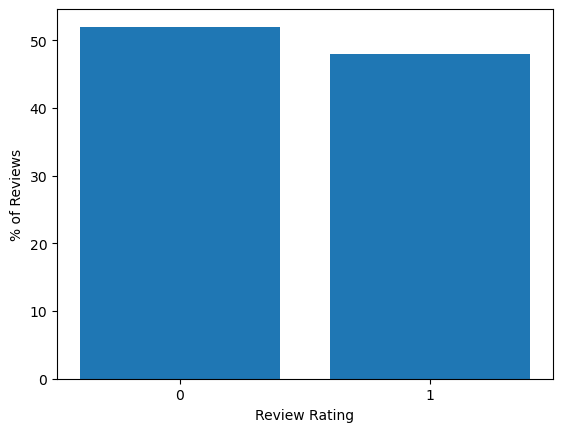

Class imbalance: [0.52 0.48]


In [139]:
values, counts = np.unique(df['rating'], return_counts=True)
normalized_counts = counts/counts.sum()

plt.figure()
plt.bar(["0", "1"], normalized_counts*100) # plot normalized counts
plt.xlabel('Review Rating')
plt.ylabel('% of Reviews')
plt.show()

print(f"Class imbalance: {np.round(normalized_counts, 2)}")

In [140]:
df['review'][9]

'"first month awesome. absolutely wonderful. started lightly bleeding. thought period. lasted 2 almost 3 months. take shot again. period months hard girl. top emotions insane. like cryer. never cry ever since ive shot watching finding nemo makes ball. get pissed people nothing!!! ridiculous. like dislike become shot."'

In [141]:
df.dtypes

drugName             object
condition            object
review               object
rating                int32
date                 object
usefulCount           int64
year                  int64
count_word            int64
count_unique_word     int64
count_letters         int64
dtype: object

**Column Preprocessing and Encoding**

In addition to the text data, we extend the preprocessing steps to other columns in the dataset. Categorical variables, such as drug names and conditions, are encoded into numerical representations using various encoding techniques. This conversion enables us to effectively utilize these features in our models, as most machine learning algorithms require numerical inputs.

Depending on the nature of the categorical variables, we can employ different encoding methods, such as one-hot encoding, label encoding, or ordinal encoding. These techniques help transform the categorical variables into numerical values that capture the underlying relationships and patterns in the data.

By preprocessing and encoding the categorical columns, we ensure that the data is in a suitable format for training and evaluating our models. This step allows us to leverage the valuable information contained in these variables and incorporate them into our predictive algorithms effectively.

## DATE preprocessing

we convert date to a numerical type our model can understand we can do that by taking the year month and day portion out of our datetime date type

In [142]:
# Convert the "date" column to datetime type
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

we can now look at our now dataframe

In [143]:
df.head()

,drugName,condition,review,rating,date,usefulCount,year,count_word,count_unique_word,count_letters,month,day
0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""been depo injection since january 2015, bleed...",0,2015-10-28,4,2015,100,77,558,10,28
1,Medroxyprogesterone,Abnormal Uterine Bleeding,"""i shot 11 years month ago, never 1 period eve...",0,2015-10-27,7,2015,59,46,294,10,27
2,Medroxyprogesterone,Birth Control,"""ive four shots point. birth control pills yea...",1,2015-10-26,12,2015,143,98,750,10,26
3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""i total 3 shots. got first one leaving hospit...",0,2015-10-25,4,2015,152,105,746,10,25
4,Medroxyprogesterone,Birth Control,"""this horrible shot!! got first shot august, e...",0,2015-10-24,3,2015,141,97,750,10,24


drop date column to proceed to modeling

In [144]:
df = df.drop('date', axis=1)


In [145]:
df.head()

,drugName,condition,review,rating,usefulCount,year,count_word,count_unique_word,count_letters,month,day
0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""been depo injection since january 2015, bleed...",0,4,2015,100,77,558,10,28
1,Medroxyprogesterone,Abnormal Uterine Bleeding,"""i shot 11 years month ago, never 1 period eve...",0,7,2015,59,46,294,10,27
2,Medroxyprogesterone,Birth Control,"""ive four shots point. birth control pills yea...",1,12,2015,143,98,750,10,26
3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""i total 3 shots. got first one leaving hospit...",0,4,2015,152,105,746,10,25
4,Medroxyprogesterone,Birth Control,"""this horrible shot!! got first shot august, e...",0,3,2015,141,97,750,10,24


## drugName and Condition Label Encoding

We chose to labeln encode them and not one hot encode these features because of the sheer amount of conditions and drugNames we have. If we one hot encode these features we will create a huge matrix with many features and that results in complixity problems.

In [146]:
df.dtypes

drugName             object
condition            object
review               object
rating                int32
usefulCount           int64
year                  int64
count_word            int64
count_unique_word     int64
count_letters         int64
month                 int64
day                   int64
dtype: object

In [147]:
label_encoder = LabelEncoder()
# Encode 'drugName' column
df['drugName'] = label_encoder.fit_transform(df['drugName'])

In [148]:
label_encoder = LabelEncoder()

# Encode the 'availability' column
df['condition'] = label_encoder.fit_transform(df['condition'])


In [149]:
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)


In [107]:
df.head(10)

,drugName,condition,review,rating,usefulCount,year,count_word,count_unique_word,count_letters,availability,month,day
0,1236,1,"""been depo injection since january 2015, bleed...",0,4,2015,100,77,558,3,10,28
1,1236,1,"""i shot 11 years month ago, never 1 period eve...",0,7,2015,59,46,294,3,10,27
2,1236,13,"""ive four shots point. birth control pills yea...",1,12,2015,143,98,750,3,10,26
3,1236,1,"""i total 3 shots. got first one leaving hospit...",0,4,2015,152,105,746,3,10,25
4,1236,13,"""this horrible shot!! got first shot august, e...",0,3,2015,141,97,750,3,10,24
5,1236,1,"""im 18 got heavy bleeding. ive always heard bc...",0,6,2015,113,88,554,3,10,22
6,1236,1,"""im 19 heavy painful periods since forever! go...",0,2,2015,121,89,633,3,10,21
7,1236,1,"""im 30 year old woman. got shot august 9th. bl...",0,5,2015,65,53,319,3,10,21
8,1236,1,"""im 17 years old got shot august 2015, persona...",0,2,2015,87,66,434,3,10,20
9,1236,1,"""first month awesome. absolutely wonderful. st...",0,7,2015,102,79,526,3,10,18


In [100]:
df.dtypes

drugName              int32
condition             int32
review               object
rating                int32
usefulCount           int64
year                  int64
count_word            int64
count_unique_word     int64
count_letters         int64
availability          int32
month                 int64
day                   int64
dtype: object

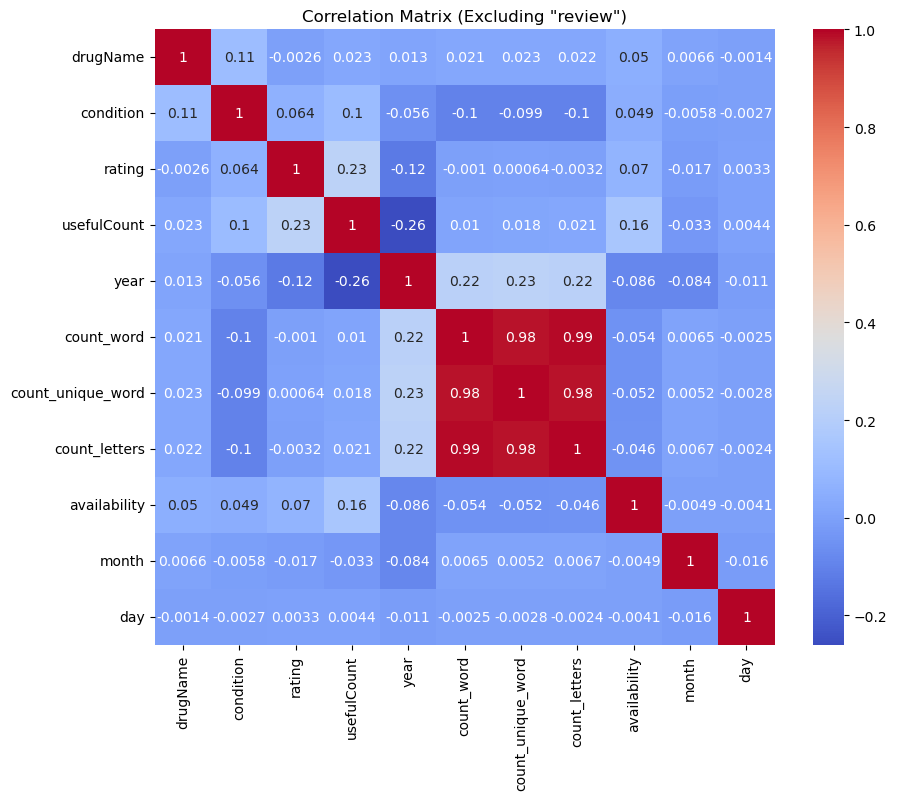

In [101]:
subset_df = df.drop('review', axis=1)

# Compute the correlation matrix
correlation_matrix = subset_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Excluding "review")')
plt.show()

i will now move foreword with the modeling notebook where i'll do the preprocessing and modeling for sentinment analyses of the reviews and classification of text.

In [102]:
df.to_csv('Sentiment_drug.csv', index=False)
